# Brist1D - Kaggle competition

## Loading and hadling dataset

In [16]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

In [17]:
df = pd.read_csv('dataset/train_corrigido.csv', header=0)
print(df.shape)
df.head(5)

/tmp/ipykernel_36463/1091358297.py:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/train_corrigido.csv', header=0)


(177024, 509)


,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,id_num
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,0
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,1
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,2
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,3
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,4


## Filtering desired collumns (based on a correlation analises)

In [18]:
def filter_desired_columns(data, include_target: bool = True):
    desired_columns = [
        "id", "p_num", "time",
        "bg-0:00", "bg-0:05", "bg-0:10", "bg-0:15", "bg-0:20", "bg-0:25", "bg-0:30", "bg-0:35", "bg-0:40", "bg-0:45", "bg-0:50", "bg-0:55",
        "insulin-0:00", "insulin-0:05", "insulin-0:10", "insulin-0:15", "insulin-0:20", "insulin-0:25", "insulin-0:30", "insulin-0:35", "insulin-0:40", "insulin-0:45", "insulin-0:50", "insulin-0:55",
        "hr-0:00", "hr-0:05", "hr-0:10", "hr-0:15", "hr-0:20", "hr-0:25", "hr-0:30", "hr-0:35", "hr-0:40", "hr-0:45", "hr-0:50", "hr-0:55",
        "steps-0:00", "steps-0:05", "steps-0:10", "steps-0:15", "steps-0:20", "steps-0:25", "steps-0:30", "steps-0:35", "steps-0:40", "steps-0:45", "steps-0:50", "steps-0:55",
        "cals-0:00", "cals-0:05", "cals-0:10", "cals-0:15", "cals-0:20", "cals-0:25", "cals-0:30", "cals-0:35", "cals-0:40", "cals-0:45", "cals-0:50", "cals-0:55",
    ]

    if include_target:
        desired_columns.append("bg+1:00")
        
    return data[desired_columns]

df = filter_desired_columns(df)
df.head(5)

,id,p_num,time,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,...,cals-0:15,cals-0:20,cals-0:25,cals-0:30,cals-0:35,cals-0:40,cals-0:45,cals-0:50,cals-0:55,bg+1:00
0,p01_0,p01,06:10:00,15.1,NaN,NaN,16.2,NaN,NaN,17.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,14.4,NaN,NaN,15.1,NaN,NaN,16.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,13.9,NaN,NaN,14.4,NaN,NaN,15.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,13.8,NaN,NaN,13.9,NaN,NaN,14.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,13.4,NaN,NaN,13.8,NaN,NaN,13.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


## Filling missing values

In [19]:
columns_to_fill = [
    "bg-0:00", "bg-0:05", "bg-0:10", "bg-0:15", "bg-0:20", "bg-0:25", "bg-0:30", "bg-0:35", "bg-0:40", "bg-0:45", "bg-0:50", "bg-0:55",
    "insulin-0:00", "insulin-0:05", "insulin-0:10", "insulin-0:15", "insulin-0:20", "insulin-0:25", "insulin-0:30", "insulin-0:35", "insulin-0:40", "insulin-0:45", "insulin-0:50", "insulin-0:55",
    "hr-0:00", "hr-0:05", "hr-0:10", "hr-0:15", "hr-0:20", "hr-0:25", "hr-0:30", "hr-0:35", "hr-0:40", "hr-0:45", "hr-0:50", "hr-0:55",
    "steps-0:00", "steps-0:05", "steps-0:10", "steps-0:15", "steps-0:20", "steps-0:25", "steps-0:30", "steps-0:35", "steps-0:40", "steps-0:45", "steps-0:50", "steps-0:55",
    "cals-0:00", "cals-0:05", "cals-0:10", "cals-0:15", "cals-0:20", "cals-0:25", "cals-0:30", "cals-0:35", "cals-0:40", "cals-0:45", "cals-0:50", "cals-0:55",
]

df[columns_to_fill] = df[columns_to_fill].interpolate()

In [20]:
imputer = SimpleImputer()

df[columns_to_fill] = imputer.fit_transform(df[columns_to_fill])

## Converting time into sin and cos pair

### Converting time to minutes

In [21]:
df['minutes_since_start'] = pd.to_datetime(df['time'], format="%H:%M:%S").dt.hour * 60 + pd.to_datetime(df['time'], format="%H:%M:%S").dt.minute
df = df.drop(columns=['time'])

### Converting minutes to sin and cos pair (summing constant 2, to avoid zero values)

In [22]:
df["time_sin"] = np.sin(2 * np.pi / 1440 * df['minutes_since_start']) + 2
df["time_cos"] = np.cos(2 * np.pi / 1440 * df['minutes_since_start']) + 2
df = df.drop(columns=['minutes_since_start'])
df.head(5)

,id,p_num,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,bg-0:35,...,cals-0:25,cals-0:30,cals-0:35,cals-0:40,cals-0:45,cals-0:50,cals-0:55,bg+1:00,time_sin,time_cos
0,p01_0,p01,15.1,8.246322,8.33178,16.2,8.258647,8.430463,17.3,8.268978,...,8.205366,8.126681,8.138321,8.159199,8.157495,8.086998,8.127821,13.4,2.999048,1.956381
1,p01_1,p01,14.4,8.246322,8.33178,15.1,8.258647,8.430463,16.2,8.268978,...,8.205366,8.126681,8.138321,8.159199,8.157495,8.086998,8.127821,12.8,2.994056,1.891133
2,p01_2,p01,13.9,8.246322,8.33178,14.4,8.258647,8.430463,15.1,8.268978,...,8.205366,8.126681,8.138321,8.159199,8.157495,8.086998,8.127821,15.5,2.984808,1.826352
3,p01_3,p01,13.8,8.246322,8.33178,13.9,8.258647,8.430463,14.4,8.268978,...,8.205366,8.126681,8.138321,8.159199,8.157495,8.086998,8.127821,14.8,2.971342,1.762314
4,p01_4,p01,13.4,8.246322,8.33178,13.8,8.258647,8.430463,13.9,8.268978,...,8.205366,8.126681,8.138321,8.159199,8.157495,8.086998,8.127821,12.7,2.953717,1.699294


## Removing ID columns

In [23]:
cols_to_pop = ['id', 'p_num']
identifiers = df[cols_to_pop].copy()
df = df.drop(columns=cols_to_pop)
df.head(5)

,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,bg-0:35,bg-0:40,bg-0:45,...,cals-0:25,cals-0:30,cals-0:35,cals-0:40,cals-0:45,cals-0:50,cals-0:55,bg+1:00,time_sin,time_cos
0,15.1,8.246322,8.33178,16.2,8.258647,8.430463,17.3,8.268978,8.412561,17.5,...,8.205366,8.126681,8.138321,8.159199,8.157495,8.086998,8.127821,13.4,2.999048,1.956381
1,14.4,8.246322,8.33178,15.1,8.258647,8.430463,16.2,8.268978,8.412561,17.3,...,8.205366,8.126681,8.138321,8.159199,8.157495,8.086998,8.127821,12.8,2.994056,1.891133
2,13.9,8.246322,8.33178,14.4,8.258647,8.430463,15.1,8.268978,8.412561,16.2,...,8.205366,8.126681,8.138321,8.159199,8.157495,8.086998,8.127821,15.5,2.984808,1.826352
3,13.8,8.246322,8.33178,13.9,8.258647,8.430463,14.4,8.268978,8.412561,15.1,...,8.205366,8.126681,8.138321,8.159199,8.157495,8.086998,8.127821,14.8,2.971342,1.762314
4,13.4,8.246322,8.33178,13.8,8.258647,8.430463,13.9,8.268978,8.412561,14.4,...,8.205366,8.126681,8.138321,8.159199,8.157495,8.086998,8.127821,12.7,2.953717,1.699294


In [24]:
df.to_csv("dataset/train_interpolate_circle_causalidade.csv", index=False)

## Spliting train and test dataframes

In [25]:
train = df.sample(frac=0.75, random_state=0)
test = df.drop(train.index)

In [26]:
x_train = train
y_train = train.pop('bg+1:00')

In [27]:
print(x_train.shape)
x_train.head(5)

(132768, 62)


,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,bg-0:35,bg-0:40,bg-0:45,...,cals-0:20,cals-0:25,cals-0:30,cals-0:35,cals-0:40,cals-0:45,cals-0:50,cals-0:55,time_sin,time_cos
91143,5.9,5.807317,8.354752,6.2,6.854918,11.098182,4.6,6.721488,11.227333,3.8,...,6.830000,7.380000,5.680000,5.590000,6.060000,6.06000,7.960000,8.720000,1.357212,2.766044
35758,8.2,8.200000,8.300000,8.5,8.700000,8.900000,8.5,8.400000,8.500000,8.8,...,5.600000,5.600000,5.600000,5.600000,5.600000,5.60000,5.600000,5.600000,2.965926,2.258819
65296,6.8,7.200000,7.900000,8.4,8.700000,8.700000,8.4,8.100000,7.900000,6.5,...,9.650000,9.000000,7.630000,5.180000,16.390000,7.54000,7.270000,4.820000,1.123273,1.519011
14652,10.5,10.600000,10.700000,10.8,10.900000,10.900000,11.0,11.200000,11.400000,11.4,...,1.813425,1.811918,1.810411,1.808904,1.807397,1.80589,1.804384,1.802877,2.422618,2.906308
54561,6.3,6.300000,6.300000,6.3,6.300000,6.300000,6.2,6.200000,6.200000,6.1,...,5.600000,5.600000,5.720000,5.720000,5.600000,5.60000,5.600000,5.600000,2.939693,1.657980


In [28]:
print(y_train.shape)
y_train.head(5)

(132768,)


91143    7.6
35758    7.6
65296    6.2
14652    9.0
54561    5.7
Name: bg+1:00, dtype: float64

In [29]:
x_train.to_csv("x.csv", index=False)
y_train.to_csv("y.csv", index=False)

## Building model

### Imports and GPU config

In [30]:
from keras.layers import TimeDistributed, Dense, Input, Lambda, BatchNormalization, Concatenate, Conv1D, ZeroPadding1D
from keras.models import Model
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Configurando para não alocar diretamente toda a memória da GPU (alocar conforme necessário)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # Aloca memória conforme necessário
    except RuntimeError as e:
        print(e)

Num GPUs Available:  1


### Model definition

I0000 00:00:1732315619.015730   36463 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2609 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


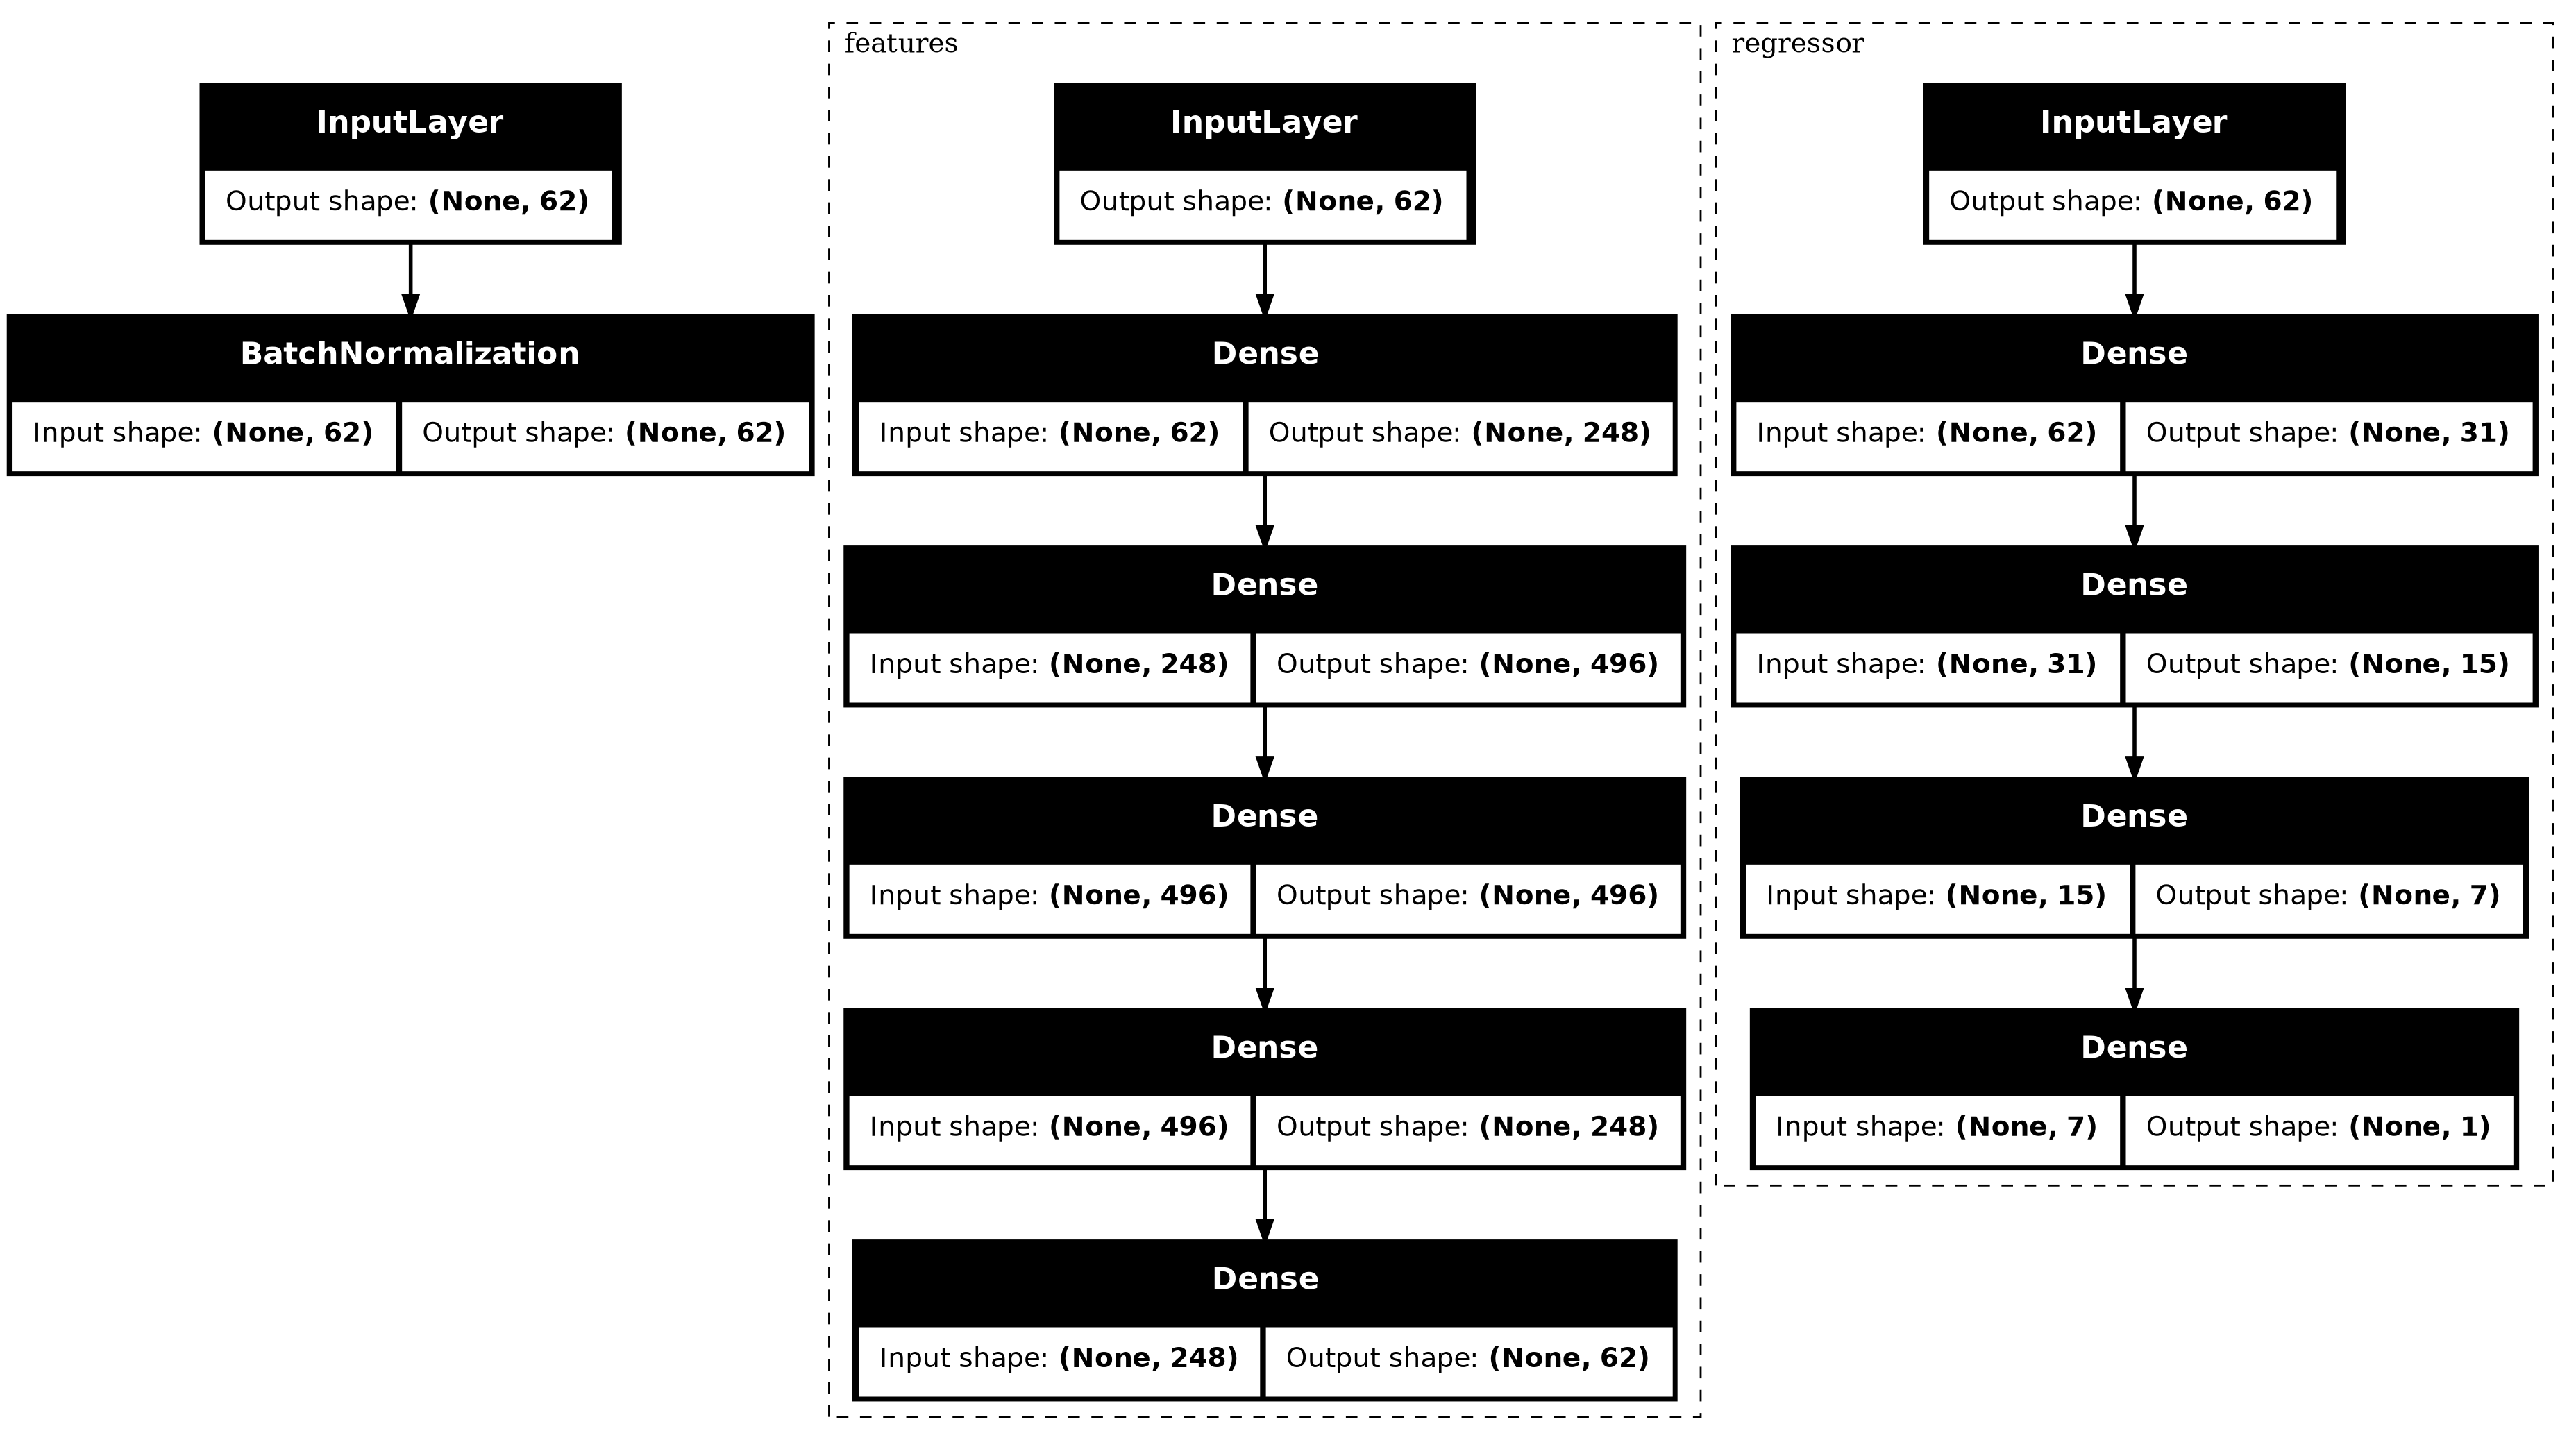

In [31]:
def extrator_features(input_dims, activation, bias):
  input_layer = Input(shape=[input_dims])

  x_0 = Dense(int(input_dims*4), activation=activation, use_bias=bias, kernel_regularizer="l2")(input_layer)
  # x_1 = tf.keras.layers.Dropout(0.2)(x_0)
  x_2 = Dense(int(input_dims*8), activation=activation, use_bias=bias)(x_0)
  x_3 = Dense(int(input_dims*8), activation=activation, use_bias=bias)(x_2)
  x_4 = Dense(int(input_dims*4), activation=activation, use_bias=bias)(x_3)
  x_bottleneck = Dense(int(input_dims), activation=activation, name='encoder', use_bias=bias, kernel_regularizer="l1")(x_4)

  return Model(input_layer, x_bottleneck, name="features")

def regressor(input_dims, output_dims, activation, bias):
  input_layer = Input(shape=[input_dims])

  x_0 = Dense(int(input_dims/2), activation=activation, use_bias=bias)(input_layer)
  x_2 = Dense(int(input_dims/4), activation=activation, use_bias=bias)(x_0)
  x_3 = Dense(int(input_dims/8), activation=activation, use_bias=bias)(x_2)
  saidas = Dense(output_dims, activation=None, name='regressor_saidas', use_bias=bias)(x_3)

  return Model(input_layer, saidas, name="regressor")

def build_models(input_dims, output_dims, activation, bias):
  # Camadas de entrada
  input_layer = Input(shape=[input_dims])

  x_n = BatchNormalization()(input_layer)

  # Kernels
  extrator = extrator_features(input_dims, activation, bias)

  # Features
  features = extrator(x_n)

  # Regressão
  regressao = regressor(features.shape[1], output_dims, activation, bias)

  saida = regressao(features)
  
  return (
      Model(input_layer, saida, name="regressao"),
      Model(input_layer, features, name="projecao")
  )

model, features = build_models(x_train.shape[1], 1, 'silu', True)
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'mean_absolute_percentage_error'])
plot_model(model, show_shapes=True, expand_nested=True)

### Training model

In [32]:
# Callback para recuperar o melhor peso, e parar quando ficar três épocas sem melhora
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=200, validation_split = 0.2, callbacks=[callback])

Epoch 1/200


I0000 00:00:1732315639.451201   36589 service.cc:148] XLA service 0x7ef6f4007dd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732315639.451339   36589 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-11-22 19:47:19.496928: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732315639.704164   36589 cuda_dnn.cc:529] Loaded cuDNN version 90501


 223/3320 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - loss: 28.8744 - mae: 3.1972 - mean_absolute_percentage_error: 40.1082 - mse: 19.8779

I0000 00:00:1732315641.520879   36589 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3320/3320 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 9.6860 - mae: 1.8693 - mean_absolute_percentage_error: 24.5100 - mse: 6.8051 - val_loss: 4.6164 - val_mae: 1.5464 - val_mean_absolute_percentage_error: 20.9635 - val_mse: 4.3420
Epoch 2/200
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 3s 867us/step - loss: 4.9387 - mae: 1.6229 - mean_absolute_percentage_error: 21.5009 - mse: 4.6790 - val_loss: 4.9018 - val_mae: 1.5973 - val_mean_absolute_percentage_error: 21.7474 - val_mse: 4.5509
Epoch 3/200
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 3s 869us/step - loss: 4.7074 - mae: 1.5898 - mean_absolute_percentage_error: 21.0107 - mse: 4.5084 - val_loss: 4.2579 - val_mae: 1.4948 - val_mean_absolute_percentage_error: 19.4721 - val_mse: 4.0925
Epoch 4/200
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 3s 881us/step - loss: 4.6204 - mae: 1.5824 - mean_absolute_percentage_error: 20.9350 - mse: 4.4615 - val_loss: 4.2272 - val_mae: 1.5052 - val_mean_absolute_percentage_error: 20.0314 - val_mse: 4.0675
Epoch 5/200
3320/3320 ━━━━━━━━━━━━━━━━━━━━

### Analysing error metrics

In [33]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['rmse'] = np.sqrt(hist['mse'])
hist['val_rmse'] = np.sqrt(hist['val_mse'])
hist.tail()

,loss,mae,mean_absolute_percentage_error,mse,val_loss,val_mae,val_mean_absolute_percentage_error,val_mse,epoch,rmse,val_rmse
81,3.694934,1.404591,18.556696,3.530923,3.874860,1.433177,19.395943,3.714307,81,1.879075,1.927254
82,3.674031,1.401677,18.517904,3.512403,3.831865,1.421982,18.993223,3.671332,82,1.874141,1.916072
83,3.705834,1.402901,18.537096,3.532697,3.916158,1.437450,19.354525,3.756620,83,1.879547,1.938200
84,3.649033,1.395827,18.441118,3.485088,3.873097,1.434124,19.074337,3.704201,84,1.866839,1.924630
85,3.678019,1.399530,18.490452,3.506136,3.916022,1.439269,19.229885,3.749529,85,1.872468,1.936370


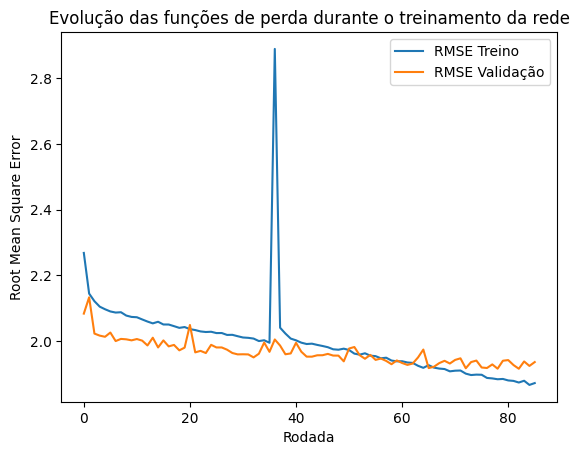

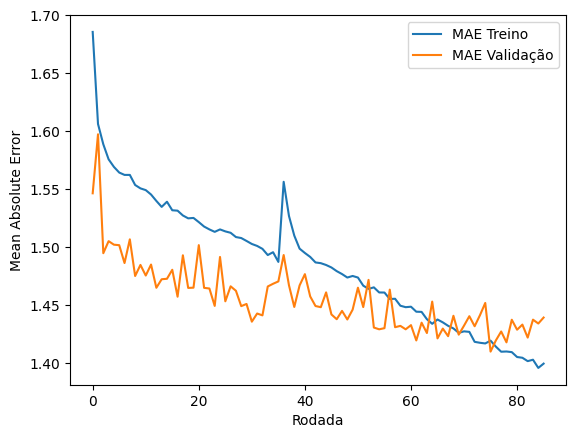

In [34]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Evolução das funções de perda durante o treinamento da rede")
plt.xlabel('Rodada')
plt.ylabel('Root Mean Square Error')
plt.plot(hist['epoch'], hist['rmse'], label='RMSE Treino')
plt.plot(hist['epoch'], hist['val_rmse'], label = 'RMSE Validação')
plt.legend()

plt.figure()
plt.xlabel('Rodada')
plt.ylabel('Mean Absolute Error')
plt.plot(hist['epoch'], hist['mae'], label='MAE Treino')
plt.plot(hist['epoch'], hist['val_mae'], label = 'MAE Validação')
plt.legend()

plt.show()

## Evaluating the model

### Preparing test dataframe

In [35]:
x_test = test
y_test = test.pop('bg+1:00')
print(x_test.shape)
x_test.head(5)

(44256, 62)


,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,bg-0:35,bg-0:40,bg-0:45,...,cals-0:20,cals-0:25,cals-0:30,cals-0:35,cals-0:40,cals-0:45,cals-0:50,cals-0:55,time_sin,time_cos
2,13.9,8.246322,8.33178,14.400000,8.258647,8.430463,15.100000,8.268978,8.412561,16.2000,...,8.279074,8.205366,8.126681,8.138321,8.159199,8.157495,8.086998,8.127821,2.984808,1.826352
10,11.9,8.246322,8.33178,11.400000,8.258647,8.430463,12.700000,8.268978,8.412561,14.8000,...,8.279074,8.205366,8.126681,8.138321,8.159199,8.157495,8.086998,8.127821,2.766044,1.357212
21,5.8,8.246322,8.33178,6.600000,8.258647,8.430463,8.600000,8.268978,8.412561,11.2000,...,8.279074,8.205366,8.126681,8.138321,8.159199,8.157495,8.086998,8.127821,2.152123,1.011638
27,3.7,7.100000,8.33178,7.366667,5.200000,8.430463,7.228571,4.800000,8.412561,7.1250,...,8.279074,8.205366,8.126681,8.138321,8.159199,8.157495,8.086998,8.127821,1.741181,1.034074
30,12.3,7.933333,8.33178,11.066667,8.000000,8.430463,10.271429,7.400000,8.412561,9.7125,...,8.279074,8.205366,8.126681,8.138321,8.159199,8.157495,8.086998,8.127821,1.557711,1.103127


In [36]:
y_test.head(5)

2     15.5
10    17.4
21     4.8
27    13.1
30     8.3
Name: bg+1:00, dtype: float64

In [37]:
x_test.to_csv("x_t.csv", index=False)
y_test.to_csv("y_t.csv", index=False)

### Running prediction

In [38]:
y_pred = model.predict(x_test)
print(y_pred)

1383/1383 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step
[[12.194556 ]
 [ 9.944831 ]
 [ 6.108664 ]
 ...
 [ 7.7156477]
 [10.583067 ]
 [11.645922 ]]


### Calculating error metrics

In [39]:
mse = tf.keras.losses.MSE(y_test, y_pred).numpy().mean()
mae = tf.keras.losses.MAE(y_test, y_pred).numpy().mean()
rmse = np.sqrt(mse)

In [27]:
print(f"RMSE Test: {rmse}")
print(f"MSE Test: {mse}")
print(f"MAE Test: {mae}")

RMSE Test: 1.9015274047851562
MSE Test: 3.6158063411712646
MAE Test: 1.4029291868209839


## Saving the model

In [41]:
model.save("brist1d_v8.keras")

## Loading and processing submission dataframe

In [24]:
df_submission = pd.read_csv('dataset/test.csv', header=0)
print(df_submission.shape)
df_submission.head(5)

(3644, 507)


,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
0,p01_8459,p01,06:45:00,NaN,9.2,NaN,NaN,10.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p01_8460,p01,11:25:00,NaN,NaN,9.9,NaN,NaN,9.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walk,Walk,Walk
2,p01_8461,p01,14:45:00,NaN,5.5,NaN,NaN,5.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p01_8462,p01,04:30:00,NaN,3.4,NaN,NaN,3.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p01_8463,p01,04:20:00,NaN,NaN,8.3,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_submission = filter_desired_columns(df_submission, False)
df_submission.head(5)

,id,p_num,time,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,...,hr-0:15,hr-0:20,hr-0:25,hr-0:30,steps-0:00,steps-0:05,steps-0:10,steps-0:15,cals-0:00,cals-0:05
0,p01_8459,p01,06:45:00,9.6,NaN,NaN,9.4,NaN,NaN,NaN,...,55.6,53.2,54.4,55.8,NaN,NaN,NaN,0.0,6.06,4.90
1,p01_8460,p01,11:25:00,4.6,NaN,NaN,6.3,NaN,NaN,6.4,...,95.6,91.6,93.5,91.1,532.0,377.0,547.0,411.0,32.43,24.57
2,p01_8461,p01,14:45:00,8.0,NaN,NaN,8.3,NaN,NaN,8.1,...,75.7,81.1,87.9,92.1,69.0,283.0,27.0,10.0,10.16,19.76
3,p01_8462,p01,04:30:00,9.9,NaN,NaN,8.5,NaN,NaN,7.8,...,59.5,58.5,61.2,60.7,0.0,NaN,NaN,14.0,4.80,4.90
4,p01_8463,p01,04:20:00,5.3,NaN,NaN,3.7,NaN,NaN,3.2,...,58.9,57.6,55.1,56.2,NaN,NaN,NaN,NaN,4.80,4.80


In [26]:
df_submission[columns_to_fill] = df_submission[columns_to_fill].interpolate()
df_submission[columns_to_fill] = imputer.transform(df_submission[columns_to_fill])

In [27]:
df_submission['minutes_since_start'] = pd.to_datetime(df_submission['time'], format="%H:%M:%S").dt.hour * 60 + pd.to_datetime(df_submission['time'], format="%H:%M:%S").dt.minute
df_submission = df_submission.drop(columns=['time'])
df_submission["time_sin"] = np.sin(2 * np.pi / 1440 * df_submission['minutes_since_start']) + 2
df_submission["time_cos"] = np.cos(2 * np.pi / 1440 * df_submission['minutes_since_start']) + 2
df_submission = df_submission.drop(columns=['minutes_since_start'])
df_submission.head(5)

,id,p_num,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,bg-0:35,...,hr-0:25,hr-0:30,steps-0:00,steps-0:05,steps-0:10,steps-0:15,cals-0:00,cals-0:05,time_sin,time_cos
0,p01_8459,p01,9.6,8.246322,8.33178,9.4,8.258647,8.430463,8.282302,10.5,...,54.4,55.8,44.927039,43.967174,43.96972,0.0,6.06,4.90,2.980785,1.804910
1,p01_8460,p01,4.6,8.246322,8.33178,6.3,8.258647,8.430463,6.400000,10.2,...,93.5,91.1,532.000000,377.000000,547.00000,411.0,32.43,24.57,2.152123,1.011638
2,p01_8461,p01,8.0,8.246322,8.33178,8.3,8.258647,8.430463,8.100000,9.9,...,87.9,92.1,69.000000,283.000000,27.00000,10.0,10.16,19.76,1.340654,1.248160
3,p01_8462,p01,9.9,8.246322,8.33178,8.5,8.258647,8.430463,7.800000,9.6,...,61.2,60.7,0.000000,205.333333,63.00000,14.0,4.80,4.90,2.923880,2.382683
4,p01_8463,p01,5.3,8.246322,8.33178,3.7,8.258647,8.430463,3.200000,9.3,...,55.1,56.2,0.000000,127.666667,99.00000,57.0,4.80,4.80,2.906308,2.422618


In [28]:
identifiers_submission = df_submission[cols_to_pop].copy()
df_submission = df_submission.drop(columns=cols_to_pop)
df_submission.head(5)

,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,bg-0:35,bg-0:40,bg-0:45,...,hr-0:25,hr-0:30,steps-0:00,steps-0:05,steps-0:10,steps-0:15,cals-0:00,cals-0:05,time_sin,time_cos
0,9.6,8.246322,8.33178,9.4,8.258647,8.430463,8.282302,10.5,8.412561,8.283803,...,54.4,55.8,44.927039,43.967174,43.96972,0.0,6.06,4.90,2.980785,1.804910
1,4.6,8.246322,8.33178,6.3,8.258647,8.430463,6.400000,10.2,8.412561,4.500000,...,93.5,91.1,532.000000,377.000000,547.00000,411.0,32.43,24.57,2.152123,1.011638
2,8.0,8.246322,8.33178,8.3,8.258647,8.430463,8.100000,9.9,8.412561,6.600000,...,87.9,92.1,69.000000,283.000000,27.00000,10.0,10.16,19.76,1.340654,1.248160
3,9.9,8.246322,8.33178,8.5,8.258647,8.430463,7.800000,9.6,8.412561,7.500000,...,61.2,60.7,0.000000,205.333333,63.00000,14.0,4.80,4.90,2.923880,2.382683
4,5.3,8.246322,8.33178,3.7,8.258647,8.430463,3.200000,9.3,8.412561,3.400000,...,55.1,56.2,0.000000,127.666667,99.00000,57.0,4.80,4.80,2.906308,2.422618


In [29]:
print(df_submission.shape)
df_submission.head(5)

(3644, 30)


,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,bg-0:35,bg-0:40,bg-0:45,...,hr-0:25,hr-0:30,steps-0:00,steps-0:05,steps-0:10,steps-0:15,cals-0:00,cals-0:05,time_sin,time_cos
0,9.6,8.246322,8.33178,9.4,8.258647,8.430463,8.282302,10.5,8.412561,8.283803,...,54.4,55.8,44.927039,43.967174,43.96972,0.0,6.06,4.90,2.980785,1.804910
1,4.6,8.246322,8.33178,6.3,8.258647,8.430463,6.400000,10.2,8.412561,4.500000,...,93.5,91.1,532.000000,377.000000,547.00000,411.0,32.43,24.57,2.152123,1.011638
2,8.0,8.246322,8.33178,8.3,8.258647,8.430463,8.100000,9.9,8.412561,6.600000,...,87.9,92.1,69.000000,283.000000,27.00000,10.0,10.16,19.76,1.340654,1.248160
3,9.9,8.246322,8.33178,8.5,8.258647,8.430463,7.800000,9.6,8.412561,7.500000,...,61.2,60.7,0.000000,205.333333,63.00000,14.0,4.80,4.90,2.923880,2.382683
4,5.3,8.246322,8.33178,3.7,8.258647,8.430463,3.200000,9.3,8.412561,3.400000,...,55.1,56.2,0.000000,127.666667,99.00000,57.0,4.80,4.80,2.906308,2.422618


### Predicting submission dataset

In [30]:
# model = tf.keras.models.load_model("brist1d.keras")

In [31]:
y_submission = model.predict(df_submission)
df_pred_submission = pd.DataFrame(y_submission, columns=['bg+1:00'])

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


### Joining identifiers

In [32]:
df_pred_submission = pd.concat([identifiers_submission, df_pred_submission], axis=1)
df_pred_submission.pop('p_num')
df_pred_submission.head(5)

,id,bg+1:00
0,p01_8459,9.315093
1,p01_8460,5.163402
2,p01_8461,7.043850
3,p01_8462,10.359314
4,p01_8463,7.163373


### Exporting submission results

In [33]:
df_pred_submission.to_csv("dataset/predictions.csv", index=False)